In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
sns.set_style("darkgrid")

In [8]:
plt.rcParams['figure.figsize'] = (16,8)

In [11]:
df = pd.read_csv('ACLBSL_2000-01-01_2021-12-31.csv')
df['Date'] = pd.to_datetime(df.Date)
# df = df[df['Date'] >= '2023-07-23']
df.head()

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
0,1,2021-12-29,34,696.0,842596.0,1227.0,1205.0,1227.0
1,2,2021-12-28,48,1322.0,1575896.8,1227.0,1180.1,1227.0
2,3,2021-12-27,45,1023.0,1256329.0,1285.2,1204.0,1204.0
3,4,2021-12-26,43,2051.0,2510045.0,1239.8,1194.2,1238.8
4,5,2021-12-23,41,1153.0,1390142.0,1221.0,1181.1,1200.0


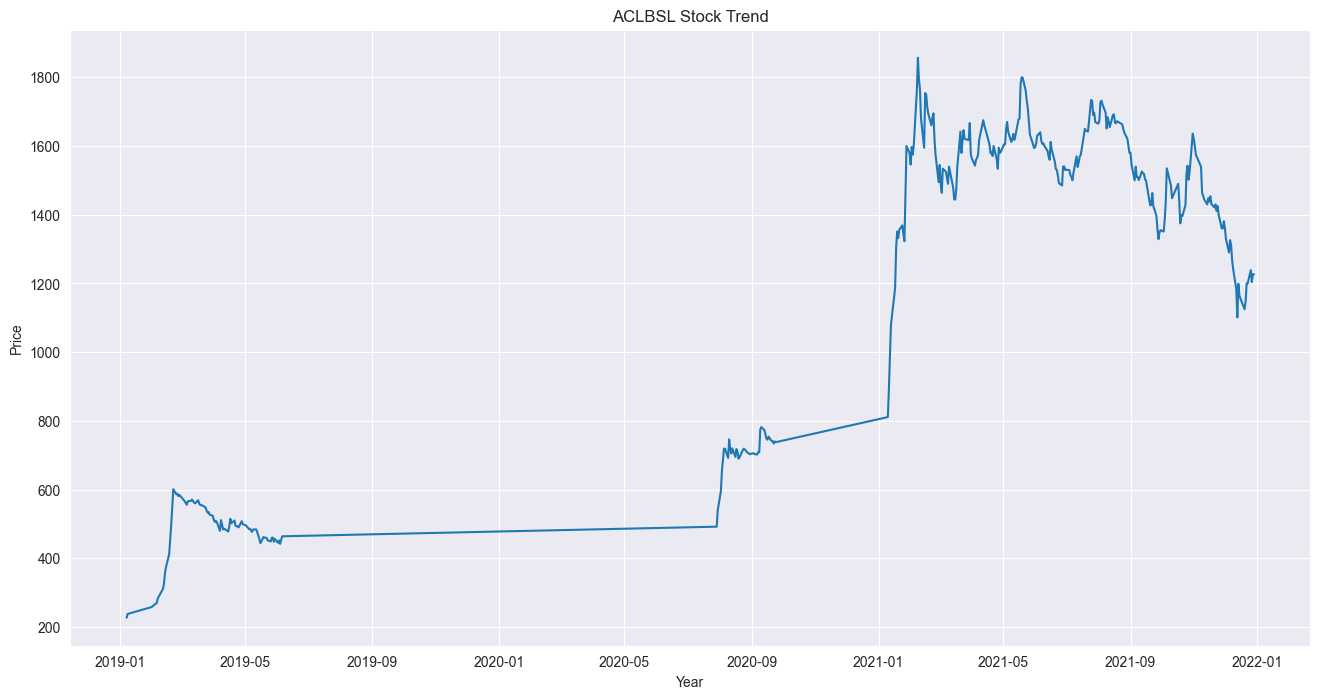

In [20]:
plt.plot(df["Date"], df["Close Price"])
plt.title("ACLBSL Stock Trend")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


In [39]:
df = df[['Date', 'Close Price']]
df.head()

df.tail()

,Date,Close Price
350,2019-02-06,283.0
351,2019-02-05,270.0
352,2019-01-31,258.0
353,2019-01-08,238.0
354,2019-01-07,227.0


In [44]:
# Calculate the 'returns' column using .pct_change() after setting the index to 'Date'
df.set_index('Date', inplace=True)
df['returns'] = df['Close Price'].pct_change() * 100

# Drop the first row with NaN value in the 'returns' column
df.dropna(subset=['returns'], inplace=True)

# Reset the index if needed
df.reset_index(inplace=True)

df.head()

C:\Users\subed\AppData\Local\Temp\ipykernel_12500\2278327999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['Close Price'].pct_change() * 100
C:\Users\subed\AppData\Local\Temp\ipykernel_12500\2278327999.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['returns'], inplace=True)


,Date,index,Close Price,returns
0,2021-12-15,7,1165.0,0.778547
1,2021-12-14,8,1199.0,2.918455
2,2021-12-13,9,1101.1,-8.165138
3,2021-12-12,10,1183.0,7.438017
4,2021-12-09,11,1241.9,4.978867


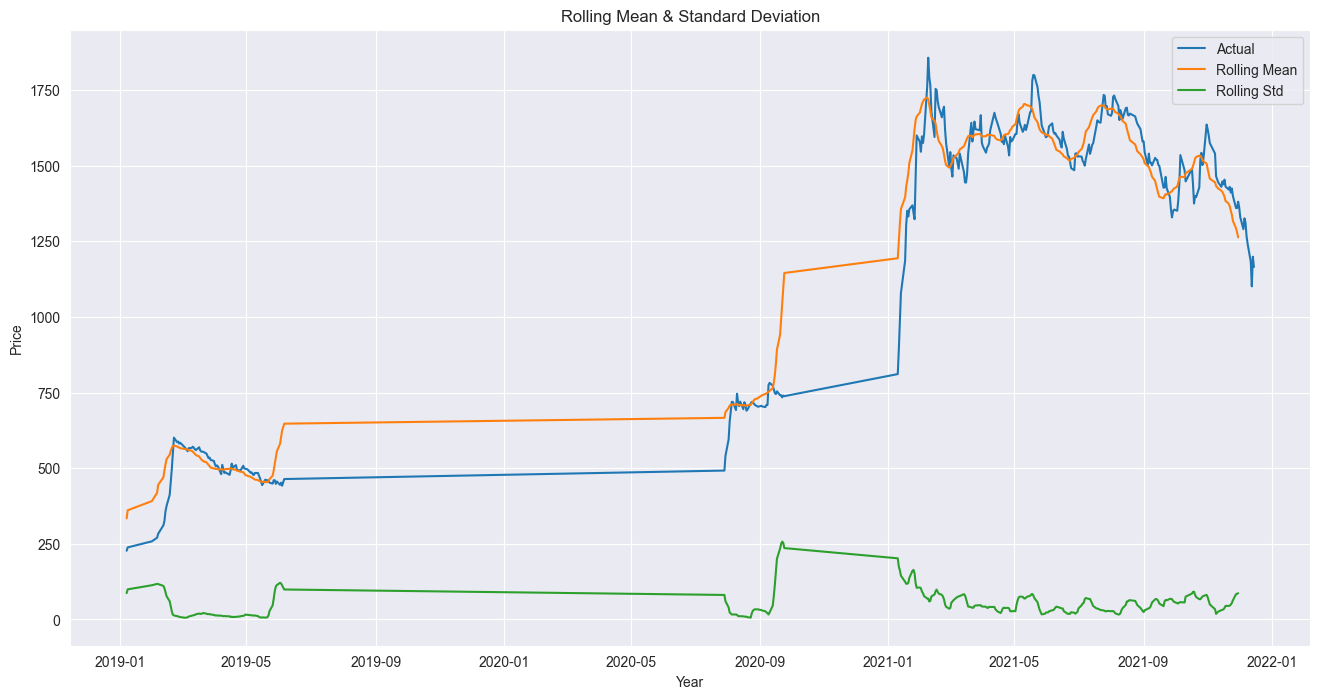

In [46]:
# High level overview of Closing price to see if it is stationary or not

rolling_mean = df['Close Price'].rolling(12).mean()
rolling_std = df['Close Price'].rolling(12).std()

plt.title('Rolling Mean & Standard Deviation')
plt.plot(df['Date'], df['Close Price'], label='Actual')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean')
plt.plot(df['Date'], rolling_std, label='Rolling Std')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

## ADF Test
Hypothesis Testing

Ho - It is non stationary (Null Hypothesis)

H1 - It is stationary (Alternate Hypothesis)

In [48]:
result = adfuller(df['Close Price'])

print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')
print('H1: The series is stationary' if result[1] <= 0.05 else 'H0: The series is non stationary')

ADF Statistic: -0.23506033345422456, p-value: 0.9342114342590337
H0: The series is non stationary


In [50]:
# Testing the series for stationarity with differencing of 1
result = adfuller(df['Close Price'].diff().dropna())

print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')
print('H1: The series is stationary' if result[1] <= 0.05 else 'H0: The series is non stationary')

ADF Statistic: -4.108637957300571, p-value: 0.0009371684890212954
H1: The series is stationary


In [51]:
# The series was stationary with differencing of 1
d = 1
print(f'Degree of differencing: {d}')

Degree of differencing: 1


In [60]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf


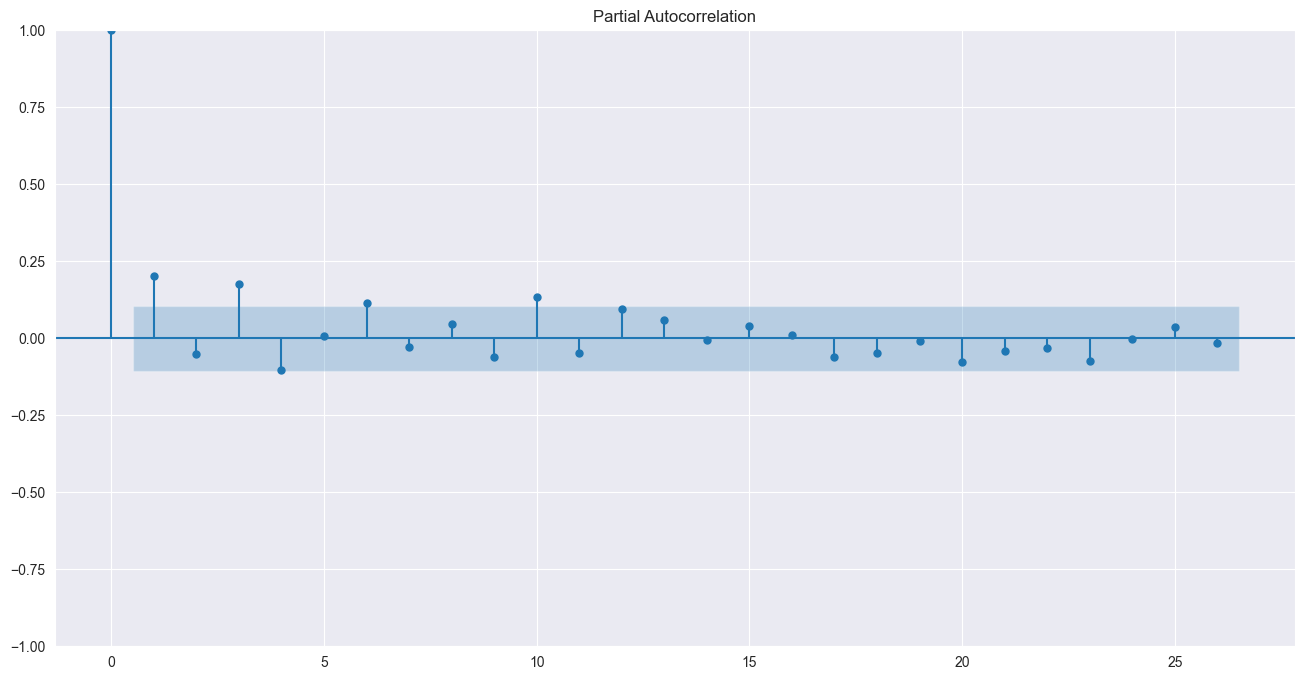

In [61]:
# Assuming you have already loaded your DataFrame as 'df'
diff = df['Close Price'].diff().dropna()

plot_pacf(diff)
plt.show()


# Fit ARIMA Model

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
p = 1

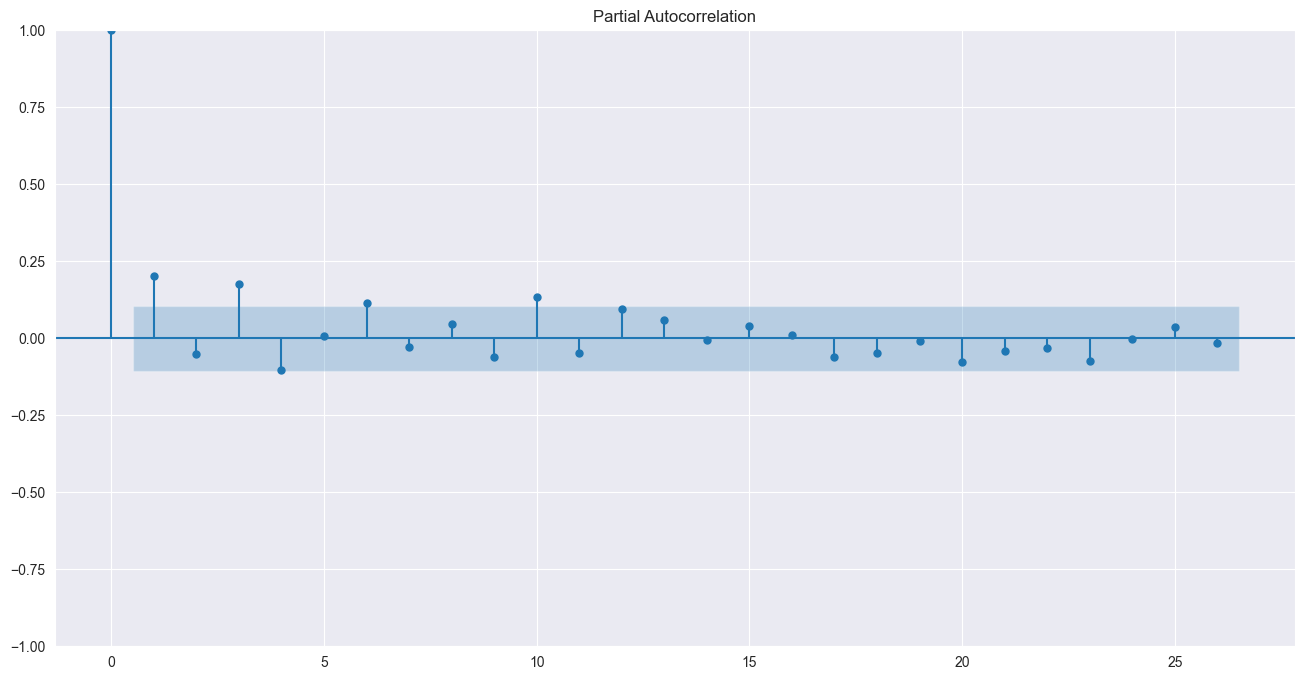

In [67]:
# Autocorrelation Function (ACF)
diff = df['Close Price'].diff().dropna()
plot_pacf(diff)
plt.show()

In [69]:
q = 1

In [70]:
print(f'ARIMA order is ({p}, {d}, {q})')

ARIMA order is (1, 1, 1)


# Train Testing

In [73]:
# Assuming you have already imported necessary libraries (e.g., pandas, sklearn)
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into train and test sets
X_train, X_test = train_test_split(df['Close Price'], test_size=0.30, shuffle=False)
print(X_train.shape, X_test.shape)


(243,) (105,)


In [77]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA Model
model = SARIMAX(X_train, order=(p, d, q))
result = model.fit(disp=0)
print(result.summary())


# # ARIMA Model
# model = ARIMA(X_train, order=(p, d, q))
# result = model.fit(disp=0)
# result.summary()

                               SARIMAX Results                                
Dep. Variable:            Close Price   No. Observations:                  243
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1247.624
Date:                Sun, 30 Jul 2023   AIC                           2501.247
Time:                        19:07:00   BIC                           2511.714
Sample:                             0   HQIC                          2505.464
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3585      0.172     -2.082      0.037      -0.696      -0.021
ma.L1          0.5963      0.167      3.567      0.000       0.269       0.924
sigma2      1759.6954    117.425     14.986      0.0

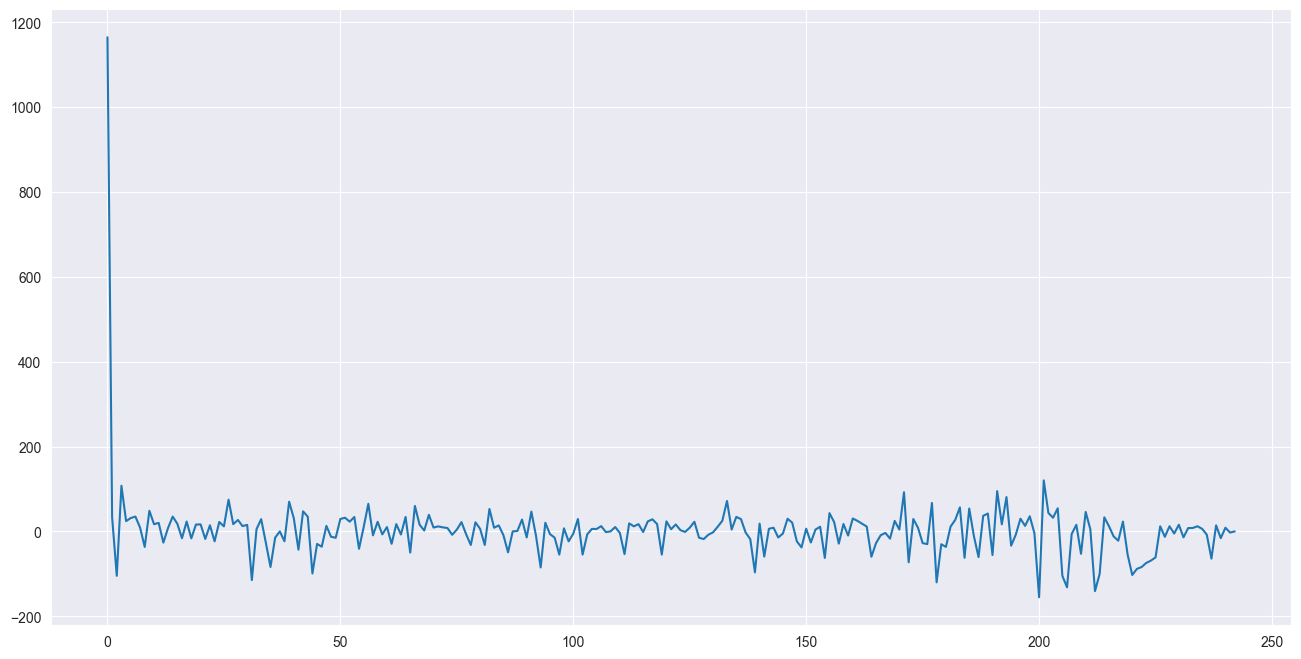

In [81]:
# Plotting residual errors
residuals = pd.DataFrame(result.resid)

plt.plot(residuals)
plt.show()

# The residual mean is centered around 0
     